# ShowTime Project

## Context
An over-the-top (OTT) media service is a media service offered directly to viewers via the internet. The term is most synonymous with subscription-based video-on-demand services that offer access to film and television content, including existing series acquired from other producers, as well as original content produced specifically for the service. They are typically accessed via websites on personal computers, apps on smartphones and tablets, or televisions with integrated Smart TV platforms.

Presently, OTT services are at a relatively nascent stage and are widely accepted as a trending technology across the globe. With the increasing change in customers' social behavior, which is shifting from traditional subscriptions to broadcasting services and OTT on-demand video and music subscriptions every year, OTT streaming is expected to grow at a very fast pace. The global OTT market size was valued at 121.61 billion dollars in 2019 and is projected to reach 1,039.03 billion dollars by 2027, growing at a CAGR of 29.4% from 2020 to 2027. The shift from television to OTT services for entertainment is driven by benefits such as on-demand services, ease of access, and access to better networks and digital connectivity.

With the outbreak of COVID19, OTT services are striving to meet the growing entertainment appetite of viewers, with some platforms already experiencing a 46% increase in consumption and subscriber count as viewers seek fresh content. With innovations and advanced transformations, which will enable the customers to access everything they want in a single space, OTT platforms across the world are expected to increasingly attract subscribers on a concurrent basis.

## Objective
ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content in their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership.

 

## Data Description
The data contains the different factors to analyze for the content. The detailed data dictionary is given below.

**Data Dictionary**

- visitors: Number of visitors, in millions, to the platform in the past week
- ad_impressions: Number of ad impressions, in millions, across all ad campaigns for the content (running and completed)
- major_sports_event: Any major sports event on the day
- genre: Genre of the content
- dayofweek: Day of the release of the content
- season: Season of the release of the content
- views_trailer: Number of views, in millions, of the content trailer
- views_content: Number of first-day views, in millions, of the content

## Importing necessary libraries and data

In [2]:
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

## Data Overview

- Observations
- Sanity checks

In [3]:
data = pd.read_csv("ottdata.csv") #reading the data into jupyter
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns.') #printing number of rows and columns
np.random.seed(1)
data.sample(n=10)

There are 1000 rows and 8 columns.


,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
507,1.58,1323.74,0,Comedy,Sunday,Spring,57.85,0.43
818,1.54,2122.33,0,Action,Thursday,Spring,56.82,0.45
452,1.82,1152.29,0,Comedy,Friday,Fall,165.58,0.63
368,2.03,1145.37,0,Sci-Fi,Friday,Spring,59.99,0.50
242,1.75,1060.86,0,Thriller,Friday,Summer,58.99,0.50
929,1.41,1231.30,1,Comedy,Saturday,Winter,53.89,0.40
262,1.63,1623.67,0,Action,Wednesday,Winter,108.20,0.46
810,1.83,1398.05,0,Others,Friday,Fall,55.58,0.42
318,2.06,1928.85,1,Sci-Fi,Saturday,Summer,52.40,0.51
49,1.92,1342.77,1,Others,Friday,Spring,60.37,0.34


In [3]:
data.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [4]:
data.info() #checking column data types and non-null value counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [5]:
data.isnull().sum().sort_values(ascending=False) #double checking that there are no null values

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

In [18]:
data.describe(include="all").T #finds statistics of all variables

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
visitors,1000.0,NaN,NaN,NaN,1.70429,0.231973,1.25,1.55,1.7,1.83,2.34
ad_impressions,1000.0,NaN,NaN,NaN,1434.71229,289.534834,1010.87,1210.33,1383.58,1623.67,2424.2
major_sports_event,1000.0,NaN,NaN,NaN,0.4,0.490143,0.0,0.0,0.0,1.0,1.0
genre,1000,8,Others,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dayofweek,1000,7,Friday,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,1000,4,Winter,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views_trailer,1000.0,NaN,NaN,NaN,66.91559,35.00108,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,NaN,NaN,NaN,0.4734,0.105914,0.22,0.4,0.45,0.52,0.89


#### There are no null or missing values.  Without graphing, and looking only at the statistics, the data looks mostly normal with very few outliers in indepedent variables. There are an average of .47 million views on the first day.  

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of content views look like?
2. What does the distribution of genres look like?
3. The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?
4. How does the viewership vary with the season of release?
5. What is the correlation between trailer views and content views?

C:\Users\devin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='views_content', ylabel='Density'>

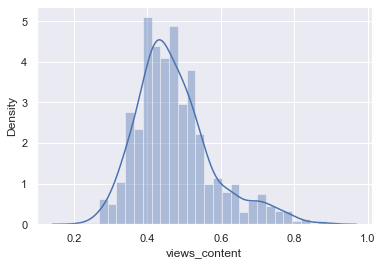

In [7]:
sns.distplot(data['views_content'])

C:\Users\devin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='genre', ylabel='count'>

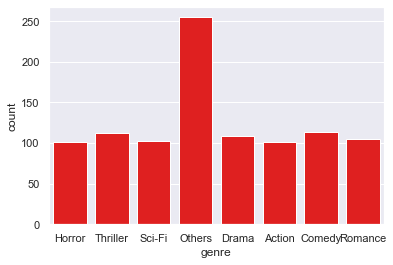

In [9]:
sns.countplot(data['genre'], color='red')

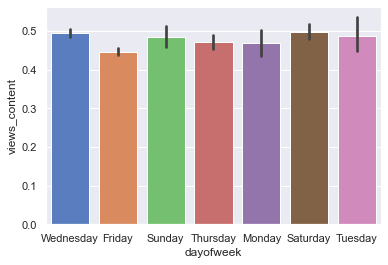

In [10]:
ax = sns.barplot(x='dayofweek', y='views_content', data=data, palette='muted') 

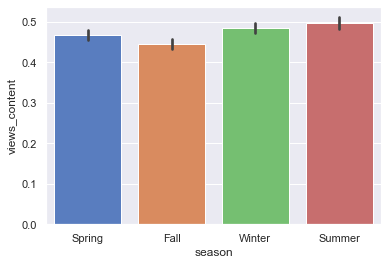

In [11]:
ax = sns.barplot(x='season', y='views_content', data=data, palette='muted') 

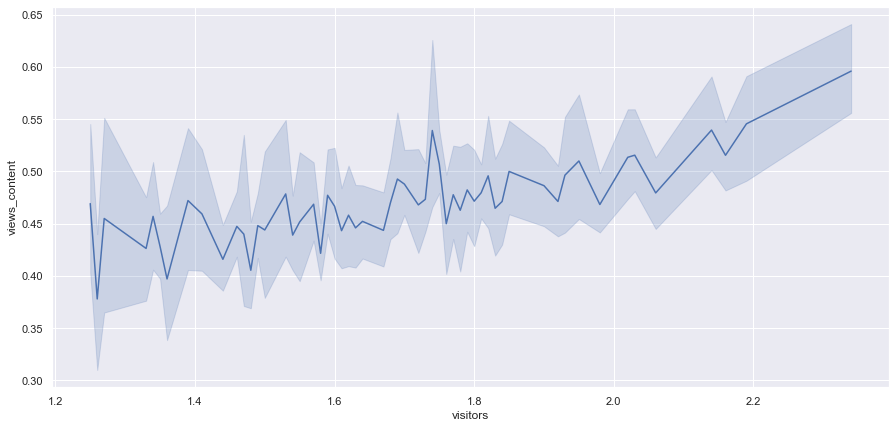

In [15]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x='visitors', y='views_content', data=data, palette='muted') 

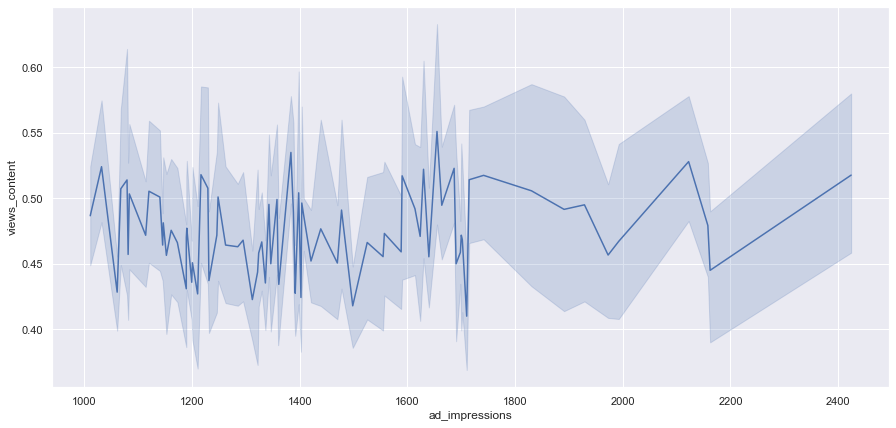

In [16]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x='ad_impressions', y='views_content', data=data, palette='muted') 

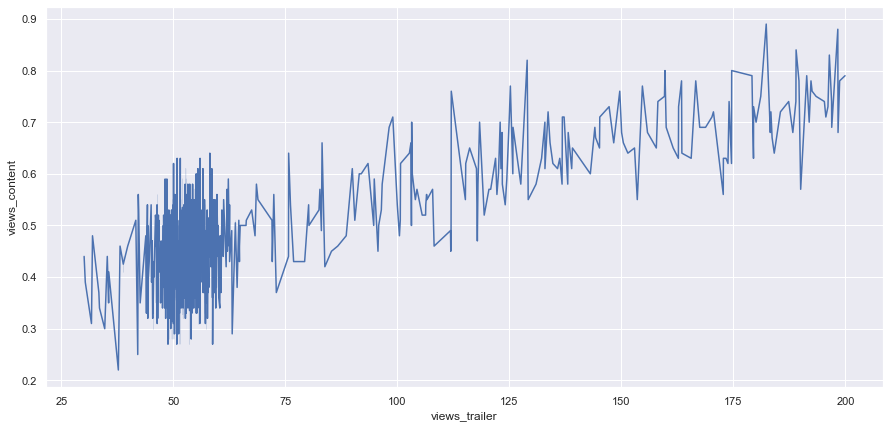

In [17]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x='views_trailer', y='views_content', data=data, palette='muted') 

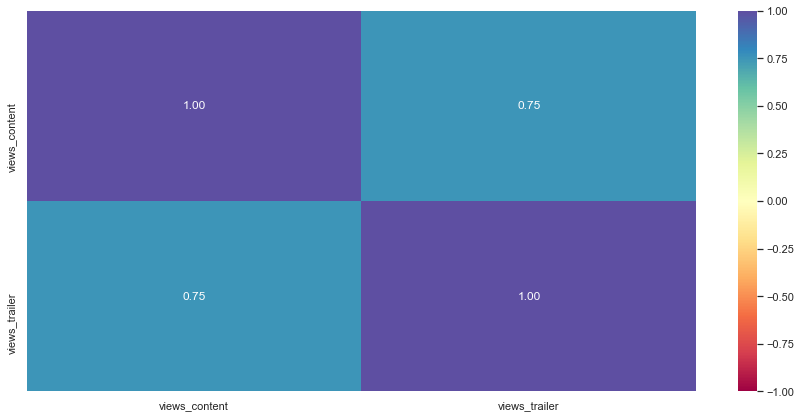

In [14]:
corr = data[['views_content','views_trailer']]
plt.figure(figsize=(15, 7))
sns.heatmap(
    corr.corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

In [15]:
corr.corr()

,views_content,views_trailer
views_content,1.000000,0.753962
views_trailer,0.753962,1.000000


In [67]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize, #creates the box and histplot
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet" #boxplot features, marks mean
    )  
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

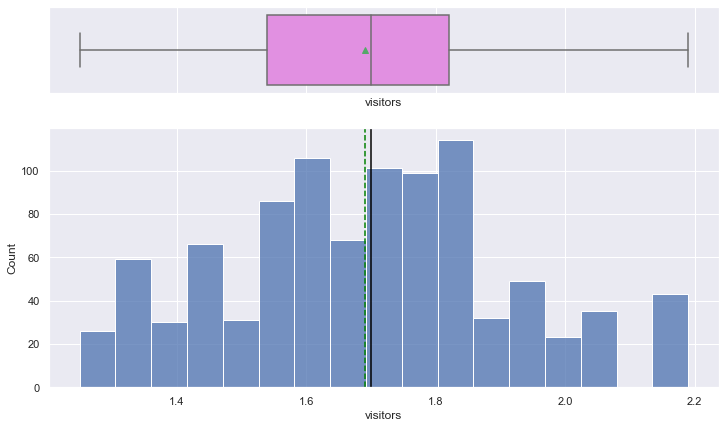

In [68]:
histogram_boxplot(df, "visitors")

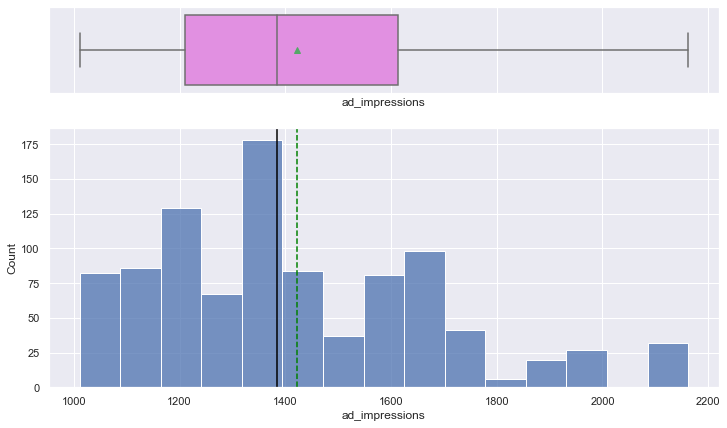

In [69]:
histogram_boxplot(df, "ad_impressions")

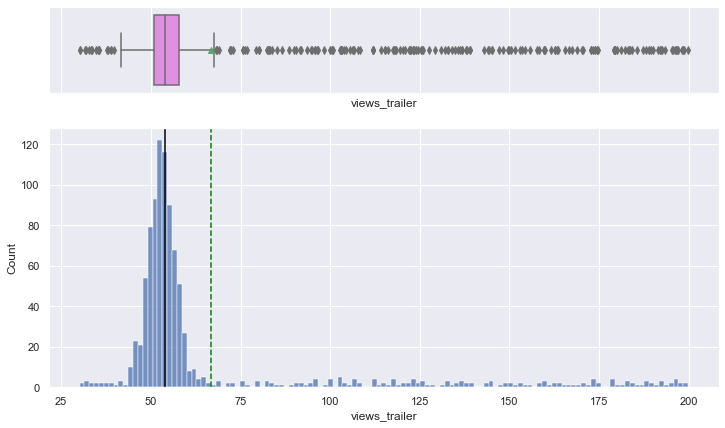

In [70]:
histogram_boxplot(df, "views_trailer")

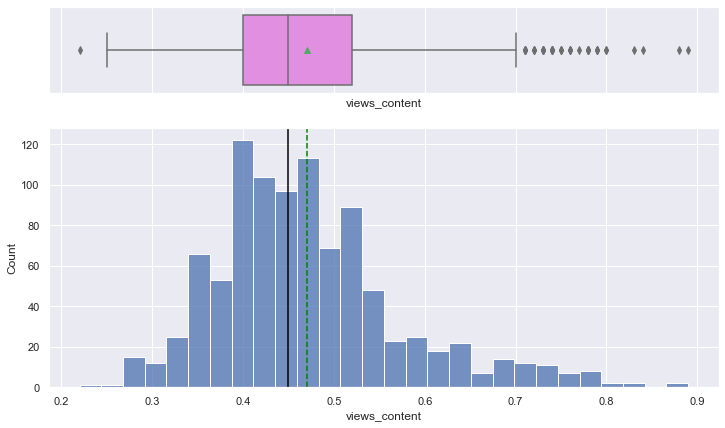

In [71]:
histogram_boxplot(df, "views_content")

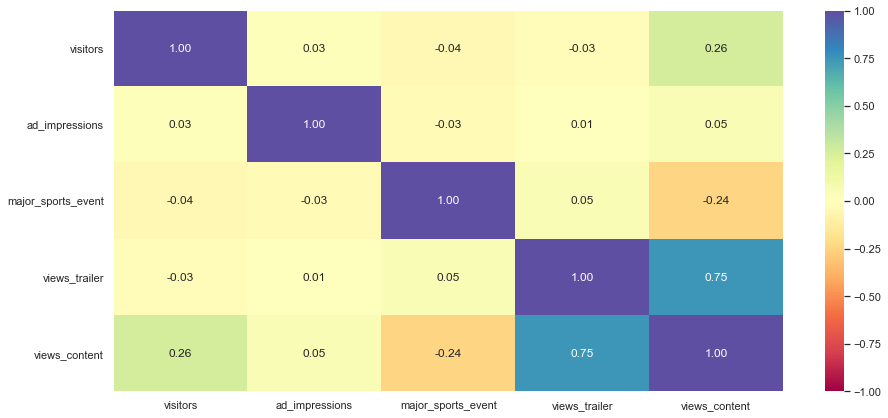

In [72]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

## Observations
#### The content_views distribution is slightly skewed to the left
#### The distribution for genre is very close among all genres, except for others which has a much higher count than the others.
#### The day of the week doesn't seem to matter much in content viewership, with Friday being slightly lower than average, and saturday being slightly higher in content viewership
#### Spring and Fall have less content viewrship than Summer and Winter, with Summer being the highest.
#### The correlation between trailer views and content views is 0.75, which is a pretty high correlation.
#### Only trailer views and content views have a high correlation value.  Major sporting event has a medium correlation with content views

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [16]:
data["genre"] = data["genre"].astype("category") #changing all object types to category types in the dataframe
data["dayofweek"] = data["dayofweek"].astype("category")
data["season"] = data["season"].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   visitors            1000 non-null   float64 
 1   ad_impressions      1000 non-null   float64 
 2   major_sports_event  1000 non-null   int64   
 3   genre               1000 non-null   category
 4   dayofweek           1000 non-null   category
 5   season              1000 non-null   category
 6   views_trailer       1000 non-null   float64 
 7   views_content       1000 non-null   float64 
dtypes: category(3), float64(4), int64(1)
memory usage: 43.0 KB


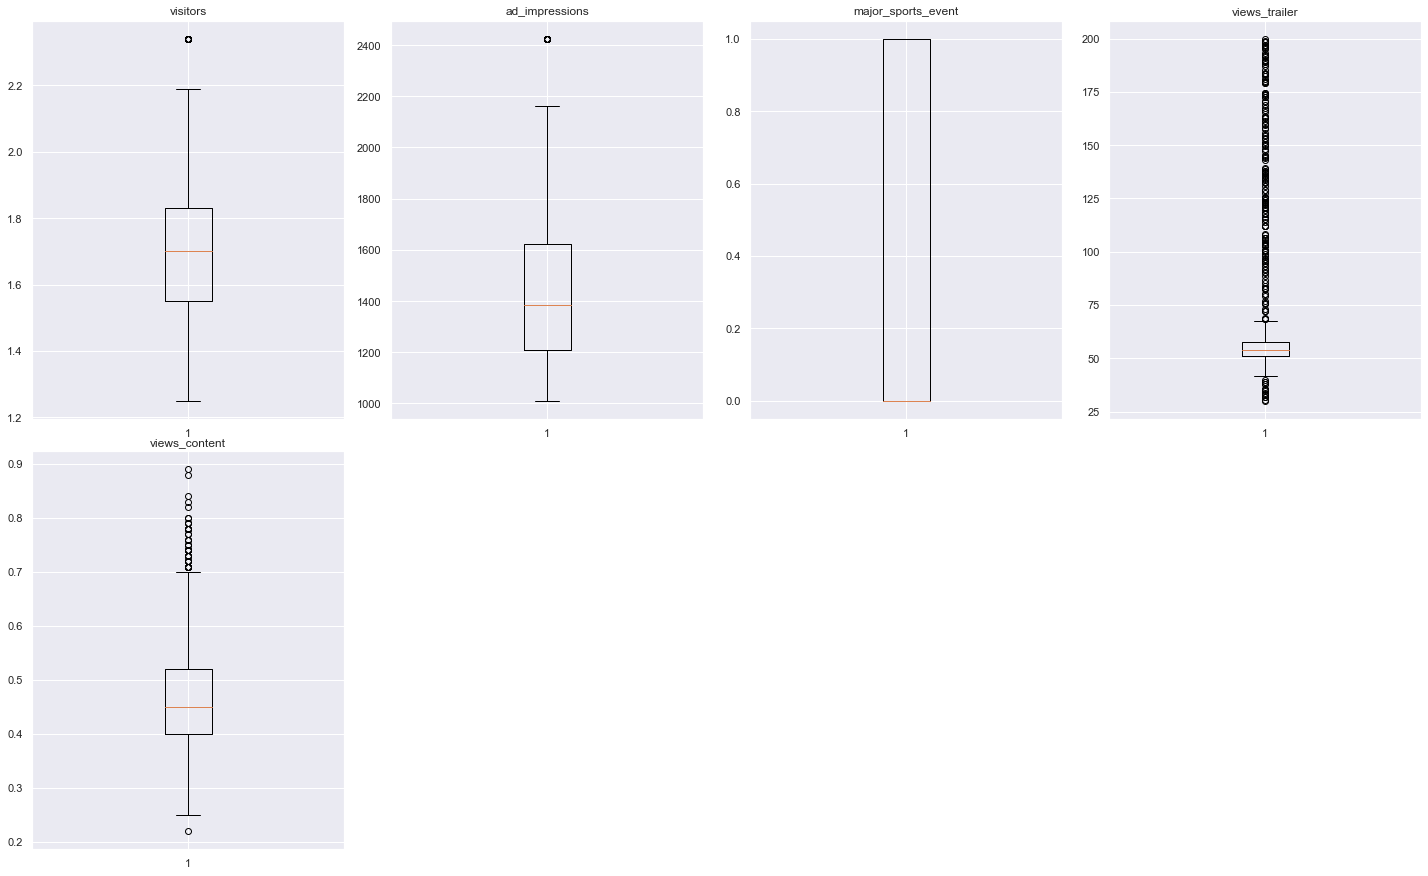

In [17]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# Plots the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### There are very few outliers in our dataset aside from content and trailer views, which are normal outliers and should be included. We should treat the outliers in ad impressions and visitors.


In [20]:
# Checks the statistical summary of the data once
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
visitors,1000.0,NaN,NaN,NaN,1.70429,0.231973,1.25,1.55,1.7,1.83,2.34
ad_impressions,1000.0,NaN,NaN,NaN,1434.71229,289.534834,1010.87,1210.33,1383.58,1623.67,2424.2
major_sports_event,1000.0,NaN,NaN,NaN,0.4,0.490143,0.0,0.0,0.0,1.0,1.0
genre,1000,8,Others,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dayofweek,1000,7,Friday,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,1000,4,Winter,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views_trailer,1000.0,NaN,NaN,NaN,66.91559,35.00108,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,NaN,NaN,NaN,0.4734,0.105914,0.22,0.4,0.45,0.52,0.89


In [21]:
cols = ['ad_impressions','visitors'] #This drops the few outliers in the ad and visitors columns

Q1 = data[cols].quantile(0.25) #This bit is a formula for the Interquartile Range to judge what to drop
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

df = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


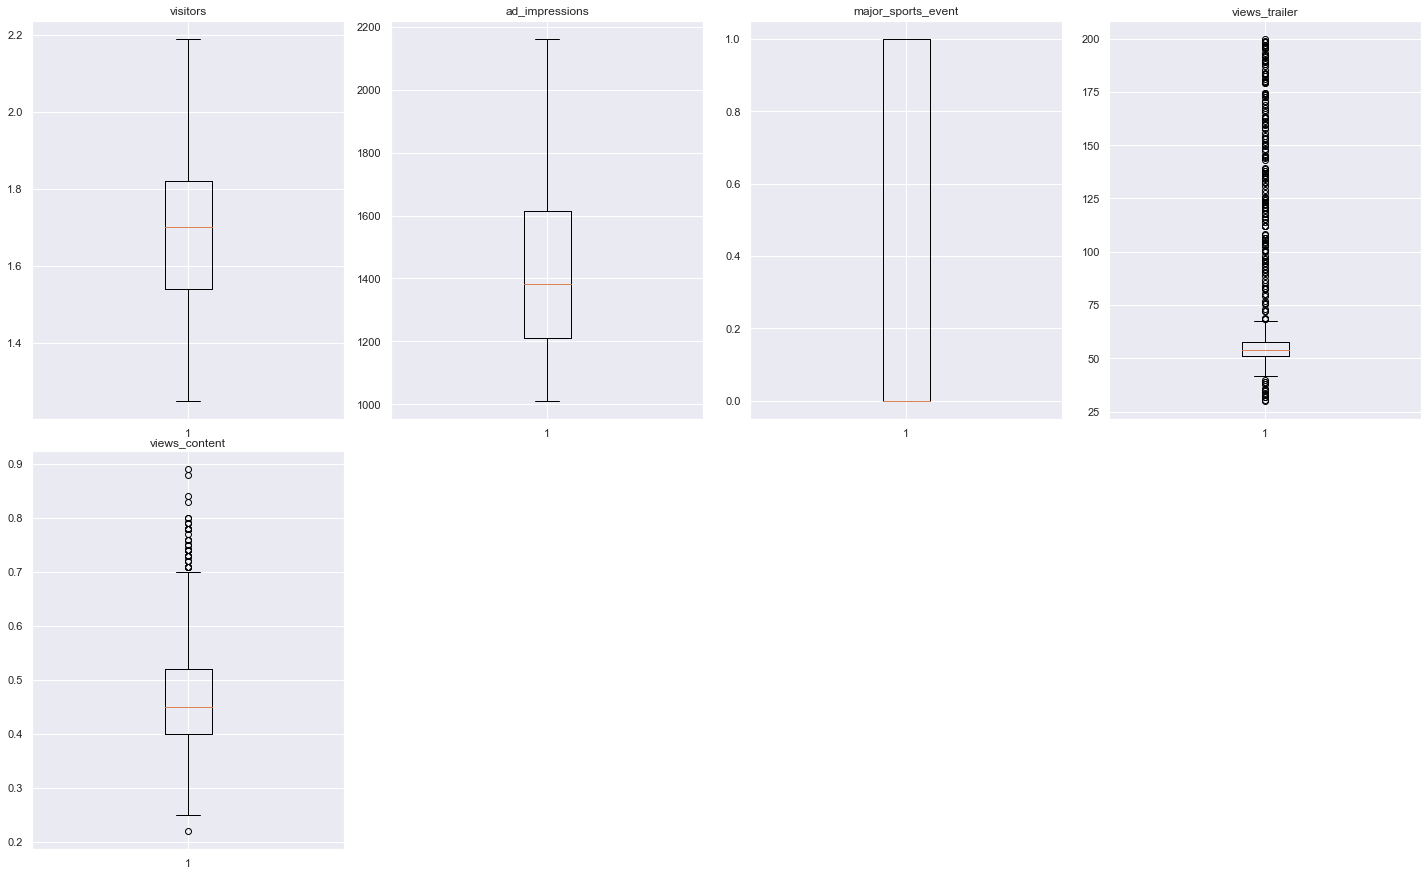

In [22]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# Plots the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### With our outliers, being treated, we can continue our data preprocessing and create dummy variables for our categorical variables

In [23]:
dummies = pd.get_dummies(df['genre'],drop_first=True)  #Creates dummy variables for genre
df = pd.concat([df,dummies],axis=1) #adds dummies into dataframe

In [24]:
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content,Comedy,Drama,Horror,Others,Romance,Sci-Fi,Thriller
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51,0,0,1,0,0,0,0
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32,0,0,0,0,0,0,1
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39,0,0,0,0,0,0,1
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44,0,0,0,0,0,1,0
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46,0,0,0,0,0,1,0


In [25]:
dummies1 = pd.get_dummies(df['dayofweek'],drop_first=True)  #Creates dummy variables for day of the week
df1 = pd.concat([df,dummies1],axis=1)

In [26]:
df1.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content,Comedy,Drama,...,Others,Romance,Sci-Fi,Thriller,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46,0,0,...,0,0,1,0,0,0,1,0,0,0


In [27]:
dummies2 = pd.get_dummies(df['season'],drop_first=True)  #Creates dummy variables for season
df2 = pd.concat([df1,dummies2],axis=1)

In [28]:
df2.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content,Comedy,Drama,...,Thriller,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Spring,Summer,Winter
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46,0,0,...,0,0,0,1,0,0,0,0,0,1


In [31]:
X = df2.drop(['genre','dayofweek','season','views_content'], axis=1) #Assigns our data to x and y. Drop the variables we created dummies for
y = df2["views_content"]

print(X.head())
print(y.head())


   visitors  ad_impressions  major_sports_event  views_trailer  Comedy  Drama  \
0      1.67         1113.81                   0          56.70       0      0   
1      1.46         1498.41                   1          52.69       0      0   
2      1.47         1079.19                   1          48.74       0      0   
3      1.85         1342.77                   1          49.81       0      0   
4      1.46         1498.41                   0          55.83       0      0   

   Horror  Others  Romance  Sci-Fi  Thriller  Monday  Saturday  Sunday  \
0       1       0        0       0         0       0         0       0   
1       0       0        0       0         1       0         0       0   
2       0       0        0       0         1       0         0       0   
3       0       0        0       1         0       0         0       0   
4       0       0        0       1         0       0         0       1   

   Thursday  Tuesday  Wednesday  Spring  Summer  Winter  
0         

#### We treated our outliers, created our dummy variables, and assigned all proper variables to X or y.

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [32]:
df2.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content,Comedy,Drama,...,Thriller,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Spring,Summer,Winter
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46,0,0,...,0,0,0,1,0,0,0,0,0,1


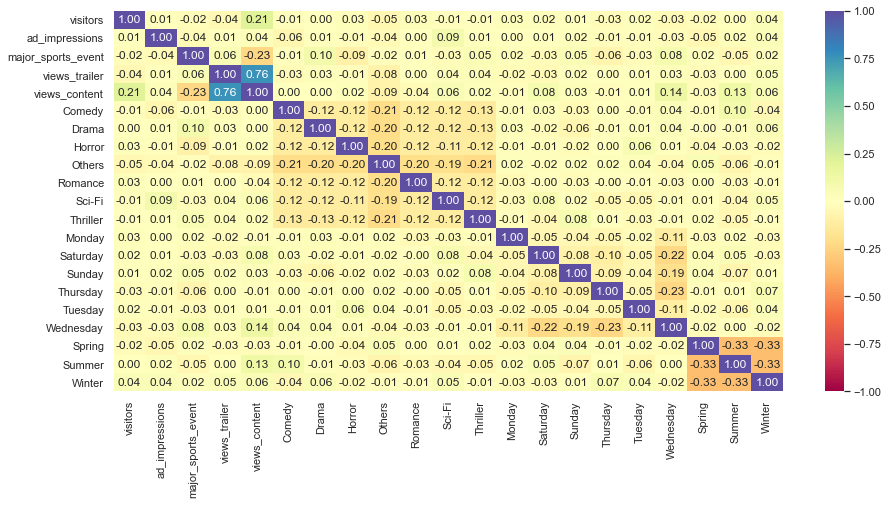

In [34]:
numeric_columns = df2.select_dtypes(include=np.number).columns.tolist()

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df2[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

C:\Users\devin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='views_content', ylabel='Density'>

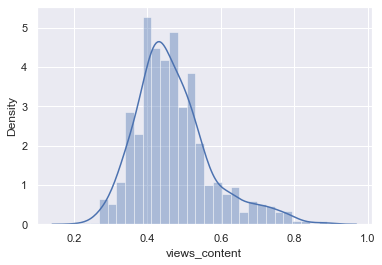

In [35]:
sns.distplot(df2['views_content']) #checks our distribution again

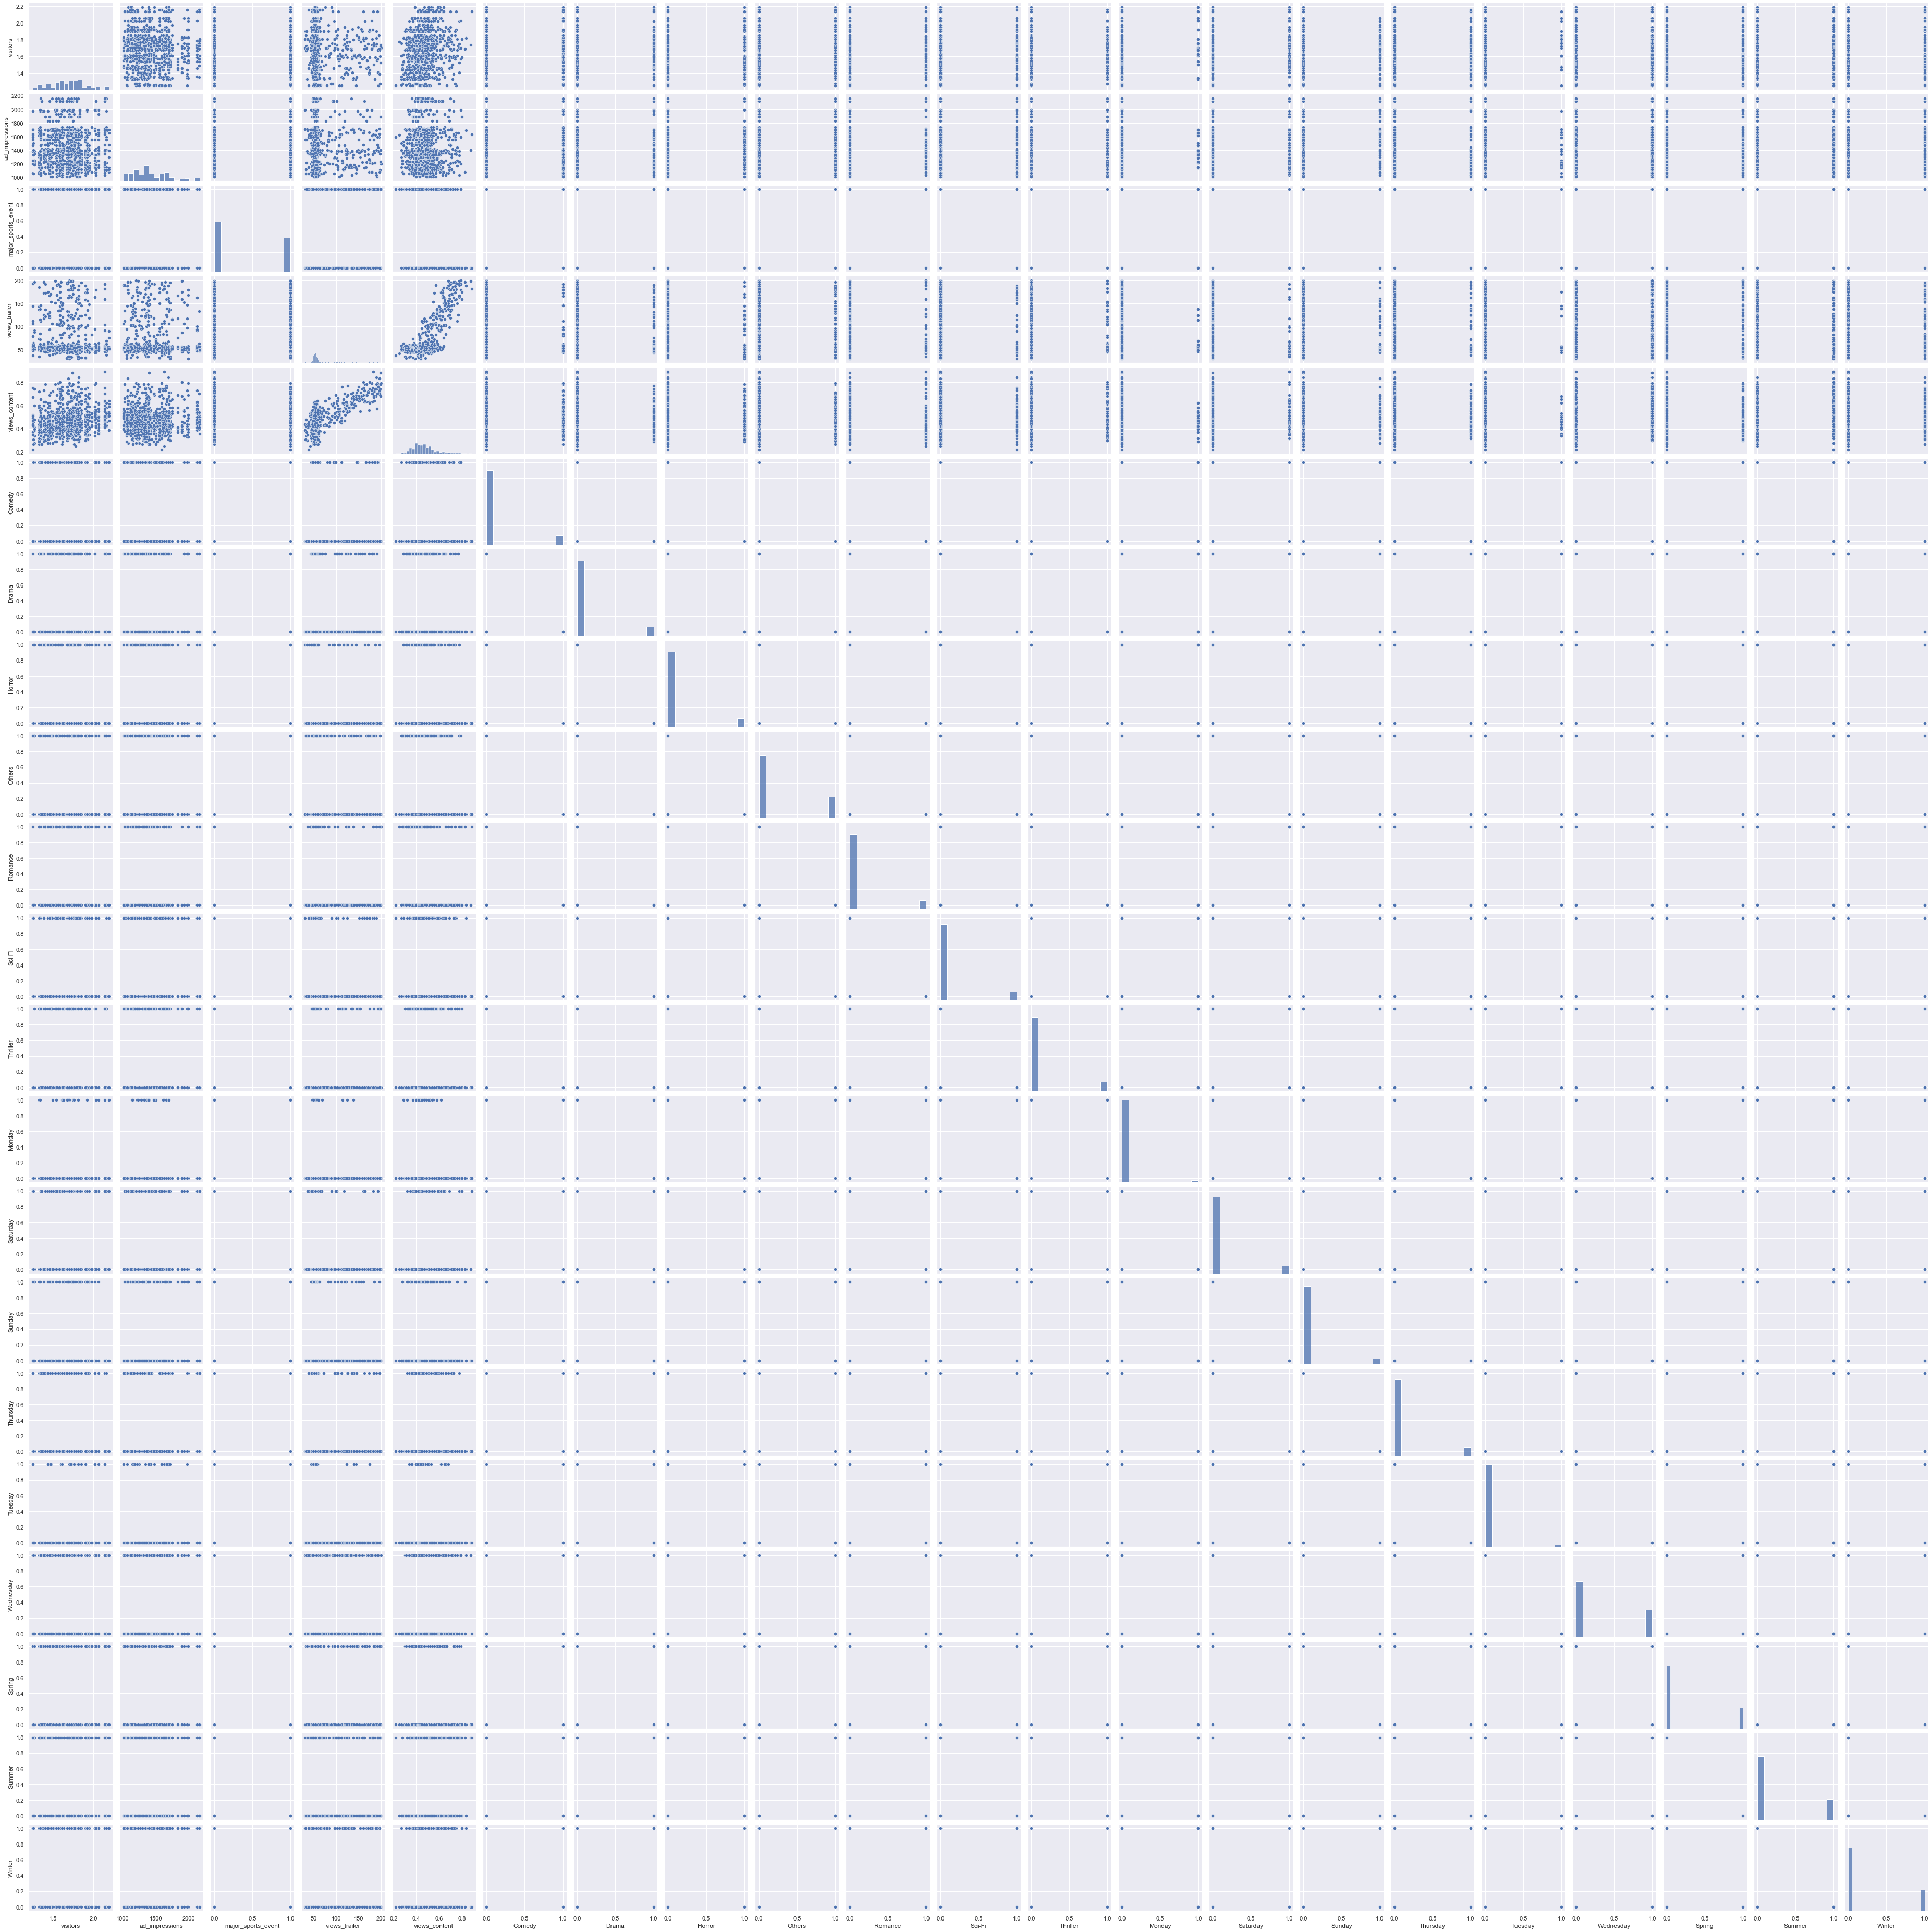

In [36]:
sns.pairplot(df2) #create a pairplot to look for dependent variables being correlated

#### Our distribution is still slightly skewed to right, which is expected since we did not treat the outliers for content viewership.  From our pairplot and heatmap, we can see that no depedent variables have a high correlation.  

## Building a Linear Regression model

In [37]:
x_train, x_test, y_train, y_test = train_test_split(  #splits our data into training and test data
    X, y, test_size=0.3, random_state=42
)

In [38]:
print("Number of rows in train data =", x_train.shape[0]) #tells us number of rows in data
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 677
Number of rows in test data = 291


In [39]:
# fitting the model on the train data
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

#### Now that we have built the model, we can check our coefficients for each depedent variable

In [40]:
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),  #tells us our coefficients for each dependent variable
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
pd.options.display.float_format = "{:,.2f}".format
coef_df

,Coefficients
visitors,0.11
ad_impressions,0.00
major_sports_event,-0.06
views_trailer,0.00
Comedy,0.01
Drama,0.01
Horror,0.02
Others,0.01
Romance,0.00
Sci-Fi,0.02


#### We want to use RMSE, MAE, and RSquared from Sklearn to judge our model. We will also create a function to calculate our MAPE. Using all of this, we will create a function to print it all out at once.

## Model performance evaluation

In [41]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
   

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [42]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.05,0.04,0.77,0.76,8.90


In [43]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.05,0.04,0.79,0.77,8.48


## Observations
The training set RSquared is 77%. This means the model explains 77% of the vartiation in the train data.
MAE and RMSE are similar, so the model is not overfitting
MAE indicates that that we can predict the number of viewers with a mean error .04 million views
MAPE manes we can predict within 8.5% of the viewersihp count.

In [44]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     110.5
Date:                Mon, 15 Nov 2021   Prob (F-statistic):          1.21e-194
Time:                        21:21:44   Log-Likelihood:                 1078.3
No. Observations:                 677   AIC:                            -2115.
Df Residuals:                     656   BIC:                            -2020.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0901      0

## Observations
Negative values of major sports event shows that viewership decreases when there is a major sporting event on.
The p-value of each variables tells us if the varaible is significant or not. Genre, besides thrillers, overall seems to not be significant, and major sports events are also not significant.
To make sure these variables aren't correlated, we need to test for multicollinearity.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

## Assumptions
1. **No Multicollinearity**
2. **Linearity of variables**
3. **Independence of error terms**
4. **Normality of error terms**
5. **No Heteroscedasticity**

We will use the Variance Inflation Factor to determine multicollinearity, if any variable has a VIF under 5, it has low multicollinearity and doesn't need to be dropped from the model. Anything over 10 is high and needs to be dropped.

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [46]:
checking_vif(x_train1) #shows us the VIF for our first training data

,feature,VIF
0,const,121.52
1,visitors,1.02
2,ad_impressions,1.04
3,major_sports_event,1.06
4,views_trailer,1.02
5,Comedy,1.77
6,Drama,1.76
7,Horror,1.79
8,Others,2.63
9,Romance,1.86


Our variables seem to be mutlicollinearity free! Now let's drop any features that has a p-value greater than 0.05.

In [47]:
# initial list of columns
cols = x_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train1[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'visitors', 'major_sports_event', 'views_trailer', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Spring', 'Summer', 'Winter']


In [48]:
x_train2 = x_train1[selected_features]
x_test2 = x_test1[selected_features]

In [49]:
olsmod2 = sm.OLS(y_train, x_train2).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     182.5
Date:                Mon, 15 Nov 2021   Prob (F-statistic):          5.47e-201
Time:                        21:28:13   Log-Likelihood:                 1072.7
No. Observations:                 677   AIC:                            -2119.
Df Residuals:                     664   BIC:                            -2061.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1111      0

Since no features have a P-Value great than 0.05, we'll assume x-train2 as the final training and olsmodel2 as our final model.
We still have Rsquared thast explains 77% of the varinace which shows the model is good, and since our original Adjusted RSquared was 77%, this shows dropping the variables didn't affect the model very much.

Now lets check the rest of the assumptions, starting with Linearity and Indepedence.

In [50]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
496,0.42,0.46,-0.04
971,0.46,0.49,-0.03
857,0.50,0.49,0.01
237,0.43,0.43,-0.00
757,0.40,0.38,0.02


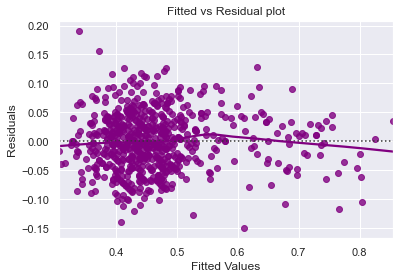

In [73]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

Since there is no pattern in our fitted values vs residulas plot, we can assume the linearity and independence assumptions are satisfied.
Now lets test for normality

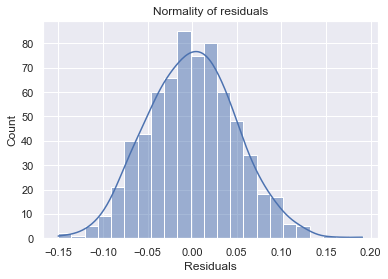

In [51]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

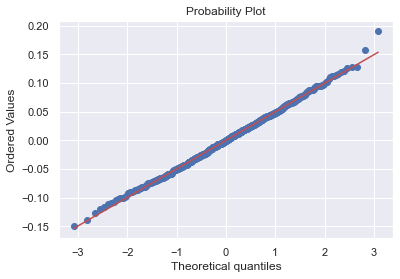

In [52]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

Since our residuals has a normal bell shape and our residuals are a straight line, we can assume the distribution is normal. However, the p-value in the in the shapiro test shows that are residuals are actually not normal, but as an apporximation, we can accept it as being close to normal.

In [53]:
stats.shapiro(df_pred["Residuals"]) #shapiro test for our predicted residuals

ShapiroResult(statistic=0.9983491897583008, pvalue=0.7780495285987854)

We need to make sure our distribution is homoscedastic, where we want a P-value greater than 0.05.

In [55]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2) #homoscedasticity test for our predicted residuals
lzip(name, test)

[('F statistic', 1.0812730334652718), ('p-value', 0.24061765275840608)]

Since our p-value > 0.05 we can assume the residuals are homoscedastic. The assumption is satisfied.
Since our assumptions are satisfied, lets test our predictions.

In [57]:
# predictions on the test set
pred = olsmod2.predict(x_test2)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
854,0.80,0.72
236,0.36,0.46
696,0.60,0.57
605,0.50,0.40
634,0.39,0.44
510,0.44,0.42
593,0.49,0.45
994,0.60,0.64
164,0.60,0.54
304,0.37,0.35


Our predicted and actual values are very close, lets plot them to get a visual.

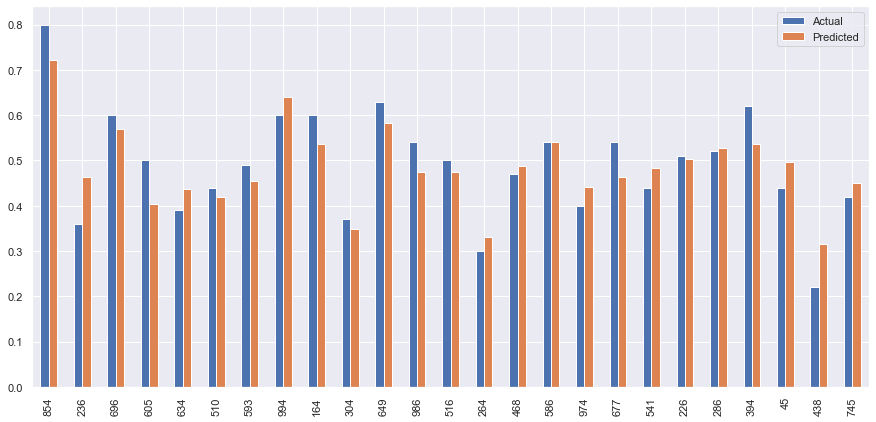

In [58]:
dataframe = df_pred_test.sample(25, random_state=1)
dataframe.plot(kind="bar", figsize=(15, 7)) #plots our predicted and actual values
plt.show()

In [60]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train2, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.05,0.04,0.77,0.76,8.99


In [61]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test2, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.05,0.04,0.79,0.78,8.40


The model can explain 79% of the variation which is good.
The train and test RMSE and MAE are low and comparable, so there is no overfitting
We can conclude our model is good for prediction as well as inference.

#### We will now compare our sklearn model and our final statsmodel model

In [62]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,0.05,0.05
MAE,0.04,0.04
R-squared,0.77,0.77
Adj. R-squared,0.76,0.76
MAPE,8.90,8.99


In [63]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,0.05,0.05
MAE,0.04,0.04
R-squared,0.79,0.79
Adj. R-squared,0.77,0.78
MAPE,8.48,8.40


The models are very close to eachother.
### Will now printout the final statsmodel summary to write our conclusions and insights

In [65]:
olsmodel_final = sm.OLS(y_train, x_train2).fit() #prints our final statsmodel
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     182.5
Date:                Mon, 15 Nov 2021   Prob (F-statistic):          5.47e-201
Time:                        21:32:44   Log-Likelihood:                 1072.7
No. Observations:                 677   AIC:                            -2119.
Df Residuals:                     664   BIC:                            -2061.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1111      0

## Final Model Summary

A 1 unit (million) increase in visitors leads to an increase of .11 (million) content views on the first day. While a major sporting event during the release of the content, leads to -.06 (million) content views on the first day.  People are more likey to watch on any other day compared to friday, and people are more likely to watch in any other season compared to fall. 
Although, initially, trailer views seemed to be the biggest driving force behind content views, we can see that it only increased our content viewership by .002 (million) compared to just the number of visitors which increased our content viewership by .11 (million).


## Actionable Insights and Recommendations

Don't put out new content on fridays or in the spring. The best day to put out new content would be wednesdays or saturdays during the Summer.  Also, do not put out new content on a day that a major sporting event falls.  The best way to gain viewership would be to increase visitors on the platform. 

- 